In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from configure import RAW_DATA
from src.load_data import load_data

In [170]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [171]:
# Load the dataset
df = load_data(RAW_DATA / "fetal_health.csv")

# 1. Overview of the Dataset

In [172]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [173]:
# Basic Information about the Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [174]:
# dimension of the dataset
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

Dataset Shape: 2126 rows and 22 columns


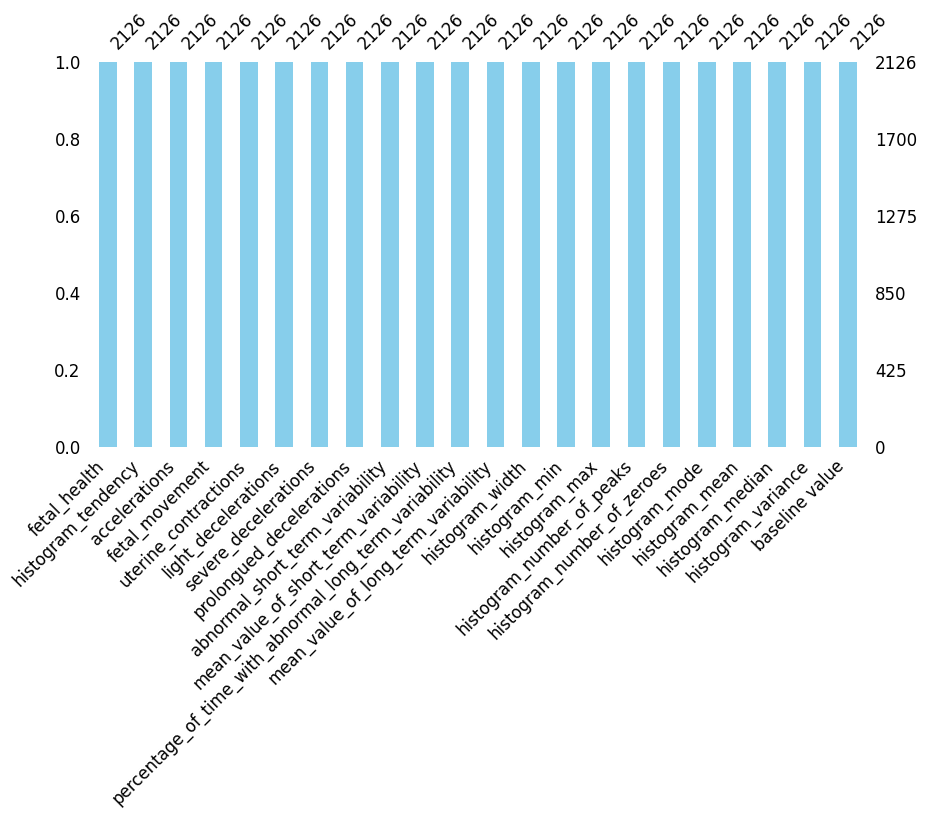

In [175]:
# Check for missing values
missing_values = msno.bar(df, figsize =(10, 5), color='skyblue', sort="descending", fontsize=12)

In [176]:
df.isnull().sum()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [177]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print(f"\nPercentage of duplicates: {(df.duplicated().sum() / len(df)) * 100:.2f}%")


Number of duplicate rows: 13

Percentage of duplicates: 0.61%


Estas líneas duplicadas es probable que sean datos válidos (distintos cardiotocogramas que arrojaron los mismos números), de modo que decidimos mantenerlos en el dataset.

In [179]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


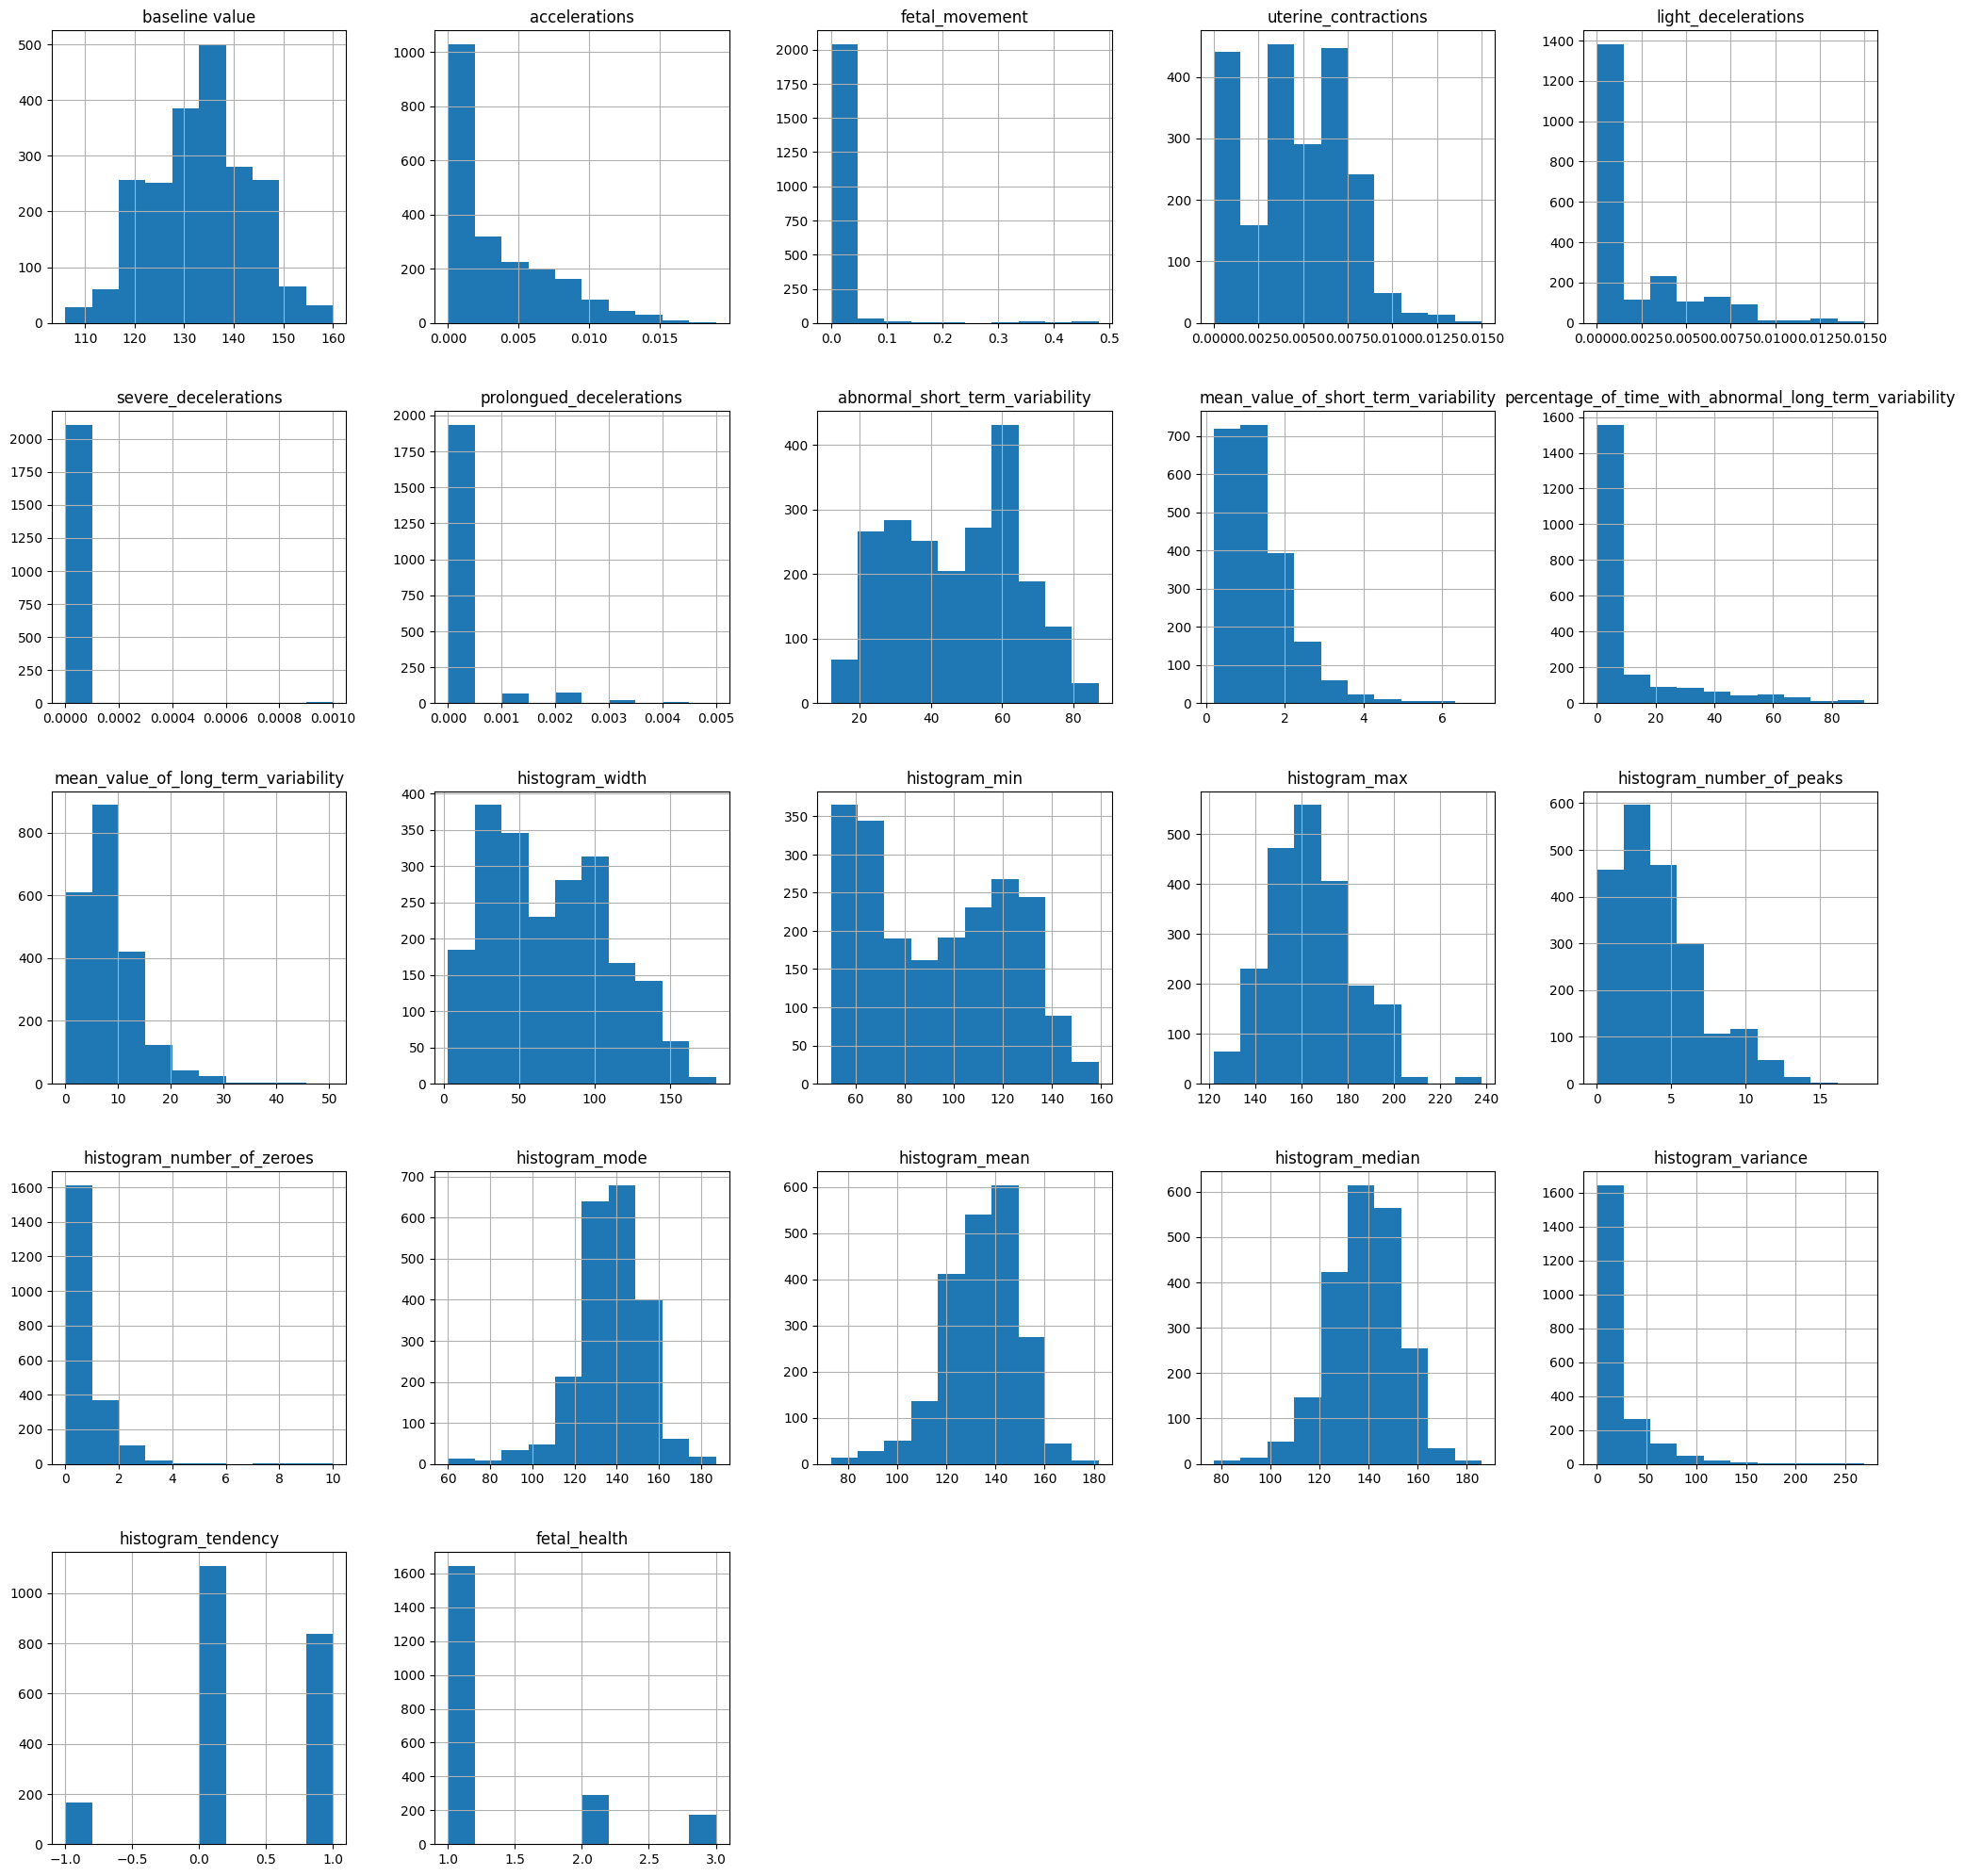

In [180]:
# distribucion de caracteristicas
hist_plot = df.hist(figsize=(25,25))

In [181]:
# 2. Análisis de Variable Objetivo (fetal_health)

## Distribución de Clases

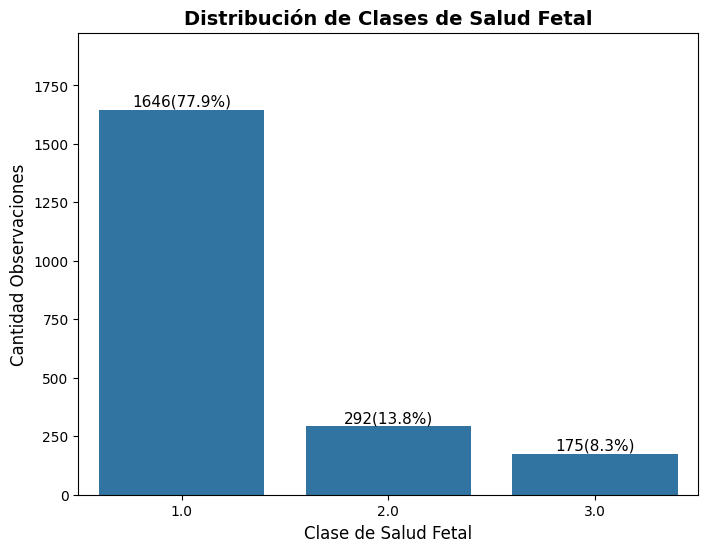

Total de observaciones: 2113


In [182]:
# Conteo y porcentaje de cada clase

class_counts = df['fetal_health'].value_counts().sort_index()
class_percentages = df['fetal_health'].value_counts(normalize=True).sort_index() * 100

# crear etiquetas combinadas: "conteo (porcentaje%)"
labels = []
for i, j in zip(class_counts, class_percentages):
    label = f"{i}({j:.1f}%)"
    labels.append(label)
    
# Crear gráfico
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values)

# Añadir etiquetas con conteo y porcentaje encima de cada barra
for i, label in enumerate(labels):
    plt.text(i, class_counts.values[i]+15, label, ha='center', fontsize=11)

# Títulos y etiquetas
plt.title('Distribución de Clases de Salud Fetal', fontsize=14, fontweight='bold')
plt.xlabel('Clase de Salud Fetal', fontsize=12)
plt.ylabel('Cantidad Observaciones', fontsize=12)
plt.ylim(0, max(class_counts.values)*1.2)  # espacio para etiquetas
plt.show()

print(f"Total de observaciones: {len(df)}")


##Visualización de Distribución

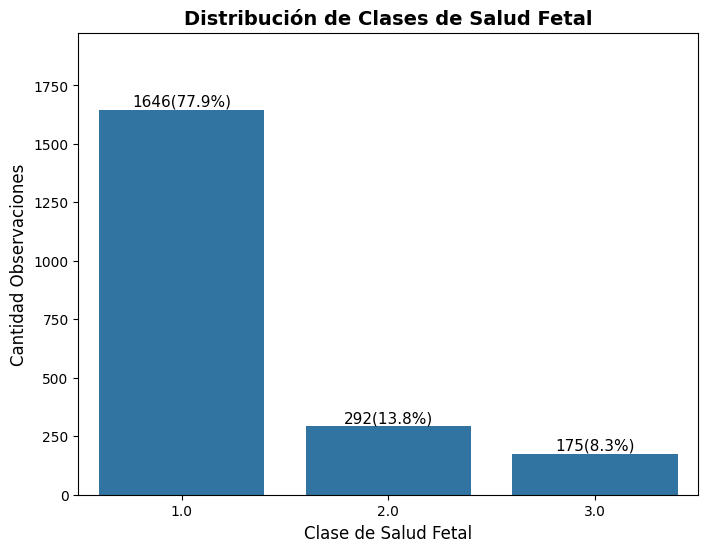

In [183]:
# Visualización con etiquetas de conteo y porcentaje

# Crear etiquetas combinadas: "conteo (porcentaje%)"
labels = []
for i, j in zip(class_counts, class_percentages):
    label = f"{i}({j:.1f}%)"
    labels.append(label)
    
# Crear gráfico
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values)

# Añadir etiquetas con conteo y porcentaje encima de cada barra
for i, label in enumerate(labels):
    plt.text(i, class_counts.values[i]+15, label, ha='center', fontsize=11)

# Títulos y etiquetas
plt.title('Distribución de Clases de Salud Fetal', fontsize=14, fontweight='bold')
plt.xlabel('Clase de Salud Fetal', fontsize=12)
plt.ylabel('Cantidad Observaciones', fontsize=12)
plt.ylim(0, max(class_counts.values)*1.2)  # espacio para etiquetas

plt.show()


## Evaluación de Balance de Clases

In [ ]:
# Calcular métricas de desbalance
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class


print("EVALUACIÓN DE BALANCE DE CLASES")
print("-" * len("EVALUACIÓN DE BALANCE DE CLASES"))
print(f"\nClase mayoritaria: {class_counts.idxmax()} con {max_class} observaciones ({class_percentages.max():.2f}%)")
print(f"Clase minoritaria: {class_counts.idxmin()} con {min_class} observaciones ({class_percentages.min():.2f}%)")
print(f"\nRatio de desbalance: {imbalance_ratio:.2f}:1")
print("-"*(len("Ratio de desbalance:")+8))


# Interpretación del desbalance
print("\nINTERPRETACIÓN:")
if imbalance_ratio < 1.5:
    print("Dataset BALANCEADO - No se requieren técnicas especiales de balanceo")
    print("   Puedes usar accuracy como métrica principal")
elif 1.5 <= imbalance_ratio < 3:
    print("Desbalance MODERADO - Considerar técnicas de balanceo")
    print("   Usar métricas: F1-score, Precision, Recall")
    print("   Tecnicas sugeridas: class_weight='balanced' en modelos")
else:
    print("🔴 Desbalance SEVERO - Técnicas de balanceo NECESARIAS")
    print("    - Usar métricas: F1-score macro/weighted, ROC-AUC")
    print("    - Técnicas sugeridas: SMOTE, undersampling, o class_weight")
    print("    - Usar stratified split en train/test")

print("-" * 60)

EVALUACIÓN DE BALANCE DE CLASES
-------------------------------

Clase mayoritaria: 1.0 con 1646 observaciones (77.90%)
Clase minoritaria: 3.0 con 175 observaciones (8.28%)

Ratio de desbalance: 9.41:1
----------------------------

INTERPRETACIÓN:
🔴 Desbalance SEVERO - Técnicas de balanceo NECESARIAS
    - Usar métricas: F1-score macro/weighted, ROC-AUC
    - Técnicas sugeridas: SMOTE, undersampling, o class_weight
    - Usar stratified split en train/test
------------------------------------------------------------


Calidad de los Datos:
- Sin valores nulos: El dataset está completo (2126 filas × 22 columnas)
- Duplicados encontrados: 13 
- Duplicados eliminados: 13
- Dataset limpio: Listo para análisis sin necesidad de limpieza inicial

Características del Dataset:
- Tamaño: 2126 observaciones
- Features: 21 variables predictoras + 1 variable objetivo (`fetal_health`)
- Tipo de datos: Todas las variables son numéricas (float64)

## Conclusiones - Análisis de Variable Objetivo

Distribución de Clases:
- Identificar aquí los hallazgos después de ejecutar las celdas
- Escribir el ratio de desbalance encontrado
- Indicar las clases presentes (ej: 1=Normal, 2=Sospechoso, 3=Patológico)

Implicaciones para el Modelado:
- Estrategia de balanceo a aplicar (si aplica)
- Métricas de evaluación a utilizar
- Necesidad de stratified split


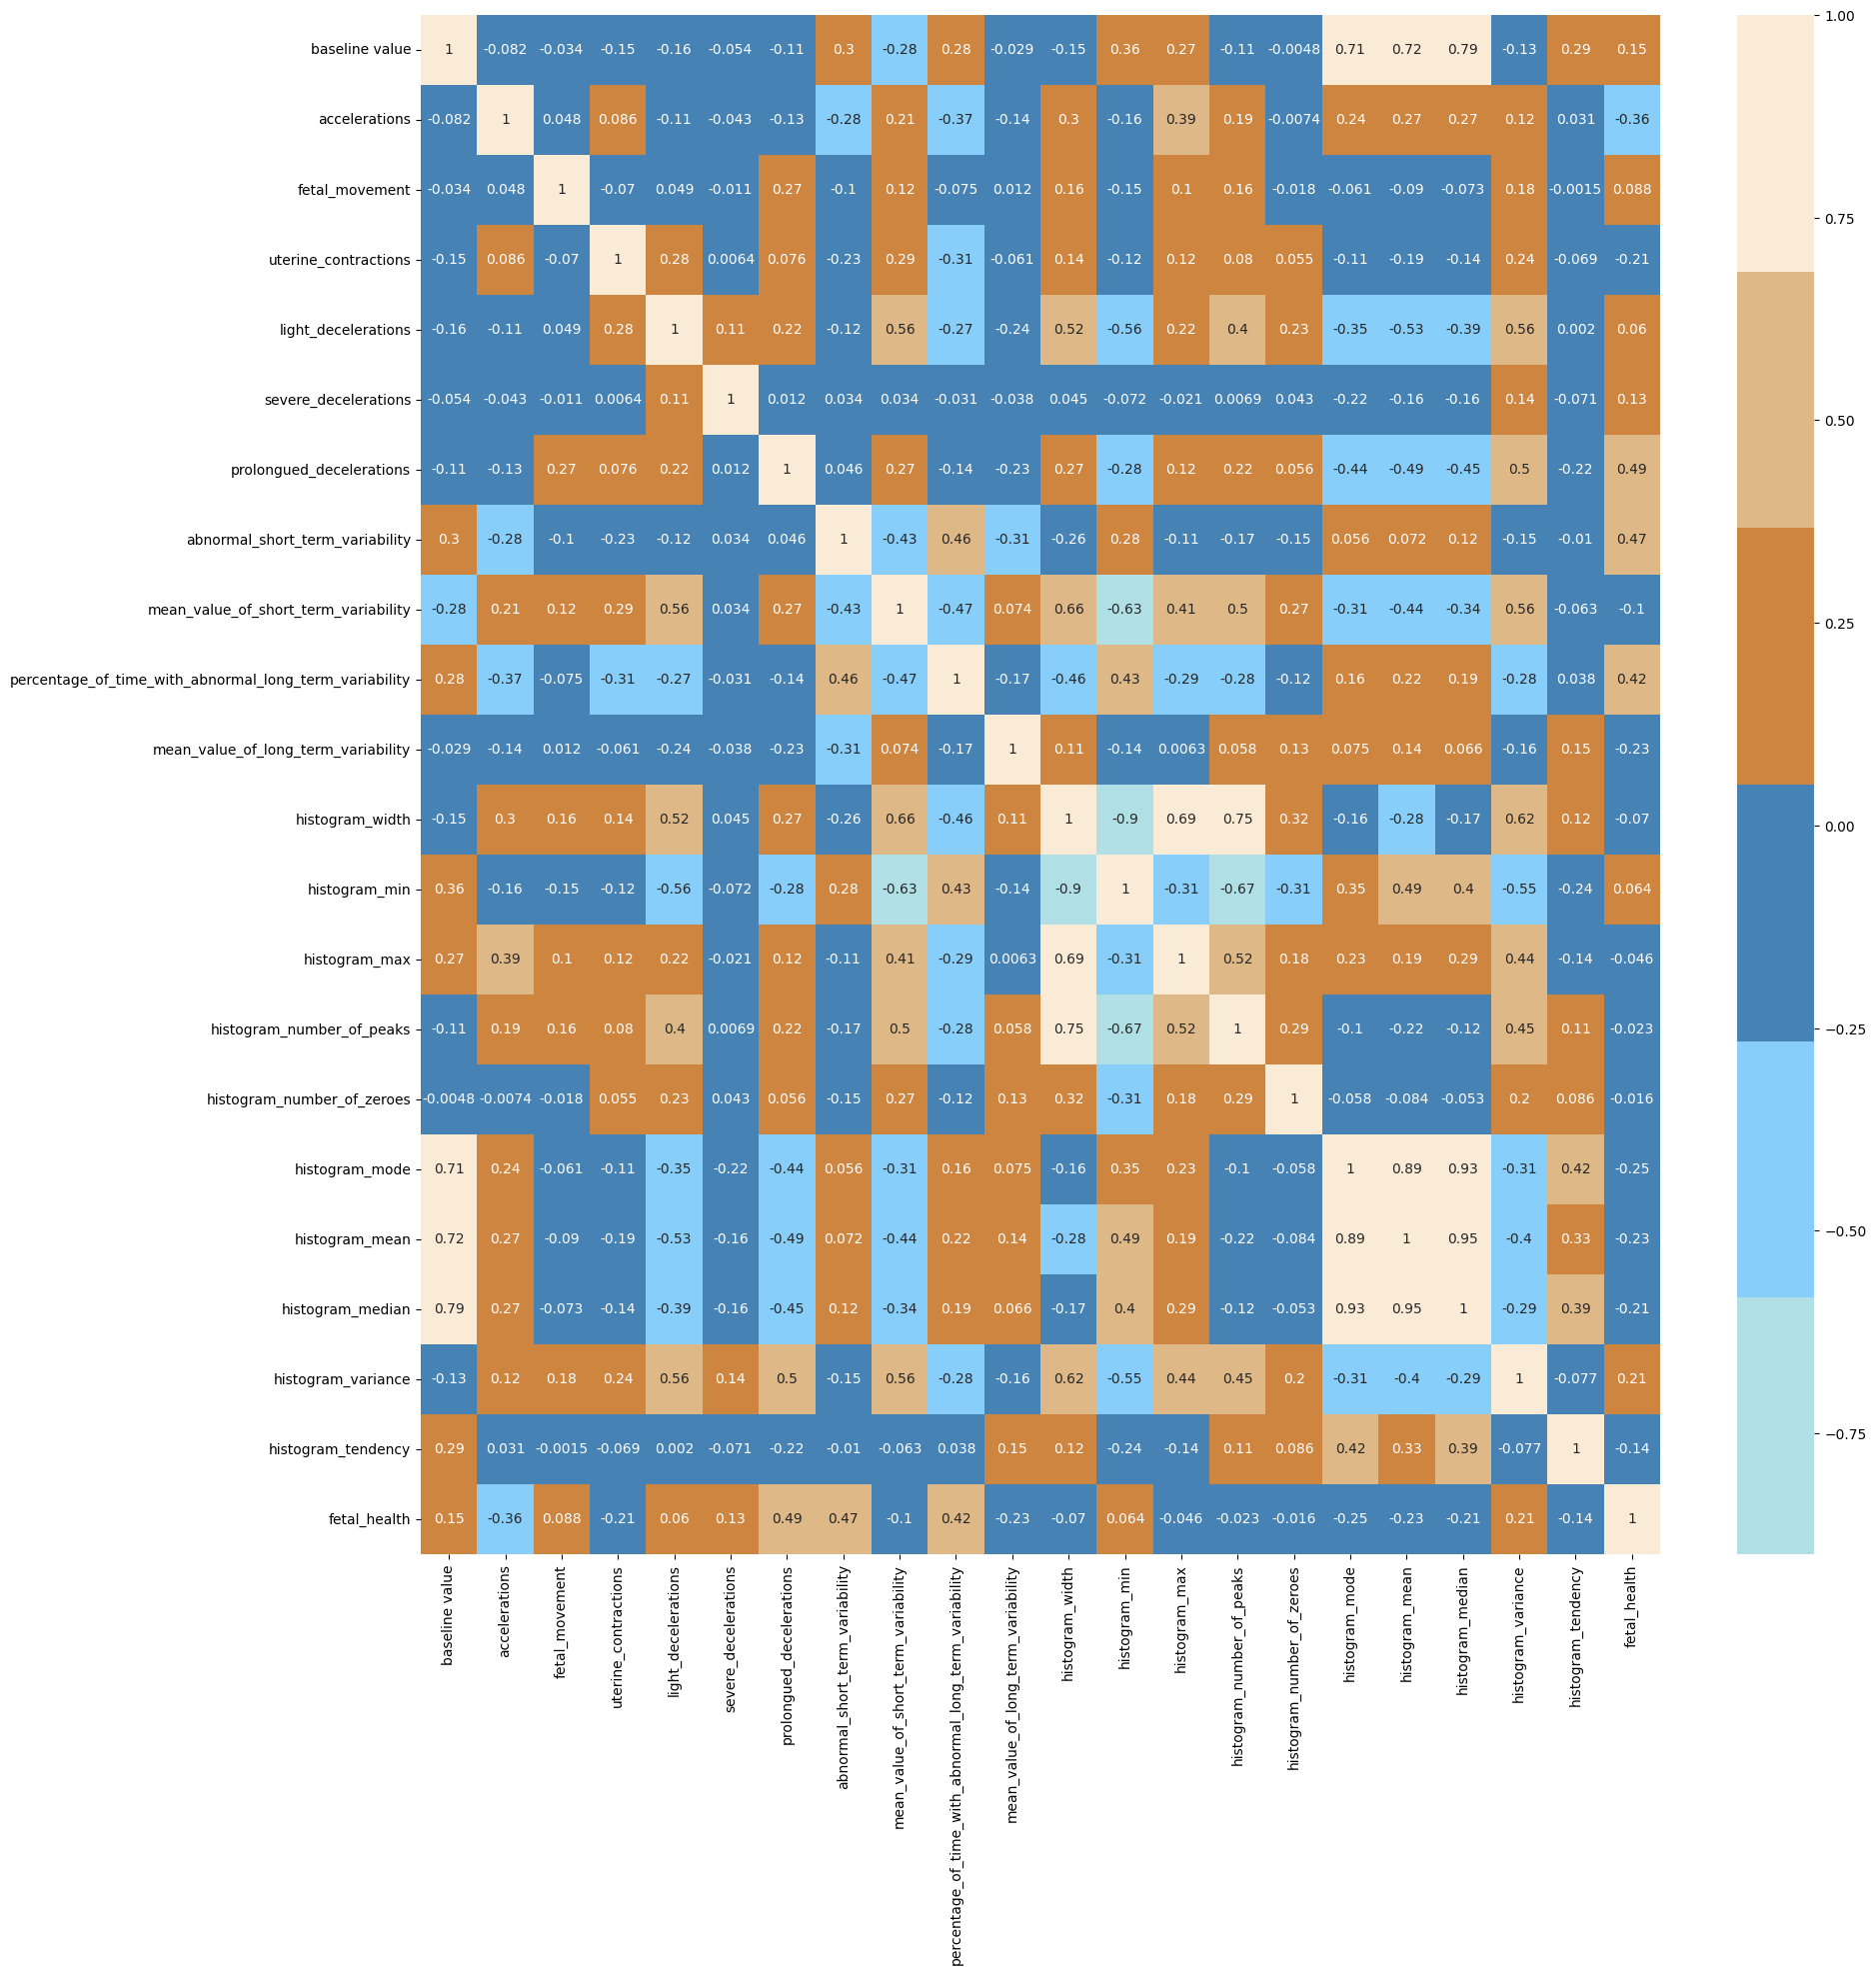

In [187]:
# Correlation Matrix Heatmap
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])

corrmat= df.corr()

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cols,annot=True)
plt.show()

Las características “prolongued_decelerations”, “abnormal_short_term_variability” y “percentage_of_time_with_abnormal_long_term_variability” están fuertemente correlacionadas y, por lo tanto, son las características más importantes.
Las características “histogram_number_of_zeroes”, “histogram_number_of_peaks”, “histogram_max” y “histogram_width” muestran una correlación menor que |0.1|, por lo que pueden eliminarse antes de alimentar el algoritmo.

In [ ]:
# Guardar el dataset limpio

from configure import DATA_DIR
processed_path = DATA_DIR / "processed" / "fetal_health_clean.csv"
df.to_csv(processed_path, index=False)
print(f"✅ Dataset guardado en: {processed_path}")
print(f"   Filas: {df.shape[0]} | Columnas: {df.shape[1]}")


✅ Dataset guardado en: /Users/ciprian/Desktop/factoria/projects/Equipo_4_Proyecto_VII_Modelos_de_ensemble/data/processed/fetal_health_clean.csv
   Filas: 2113 | Columnas: 22
